# ODE

## Euler Method
$$x(x+\Delta t)=x(t)+\dot{x}\Delta t+(\ddot{x}\frac{\Delta t^2}{2})$$
$$Error \sim \mathcal{O}(\Delta t^2)$$
E.g.1:
$$\ddot{x} = -\omega^2x-\beta\dot{x}$$
Let $$v\equiv \dot{x}$$ 
$$\dot{v}=-\omega^2x-\beta v$$
这两个一阶的微分方程联立就等价一个二阶ODE

真刀真枪地解一个:
$$\ddot{x} = -g$$
$$\dot{x}=v$$
$$\dot{v}=-g$$

$$\Rightarrow x_{i+1} = x_i+\dot{x}\Delta t=x_i+v\Delta t$$
$$\Rightarrow v_{i+1} = v_i+\dot{v}\Delta t=v_i-g\Delta t$$
这两个方程具有非常对称的形式因此可以写成：

# $$y_{i+1}(t) = y_i(t) + \dot{y}(t)\Delta t$$ 
$$y=\begin{bmatrix} x\\v \end{bmatrix}$$

$$\dot{y}=\begin{bmatrix} v\\-g \end{bmatrix}$$




In [7]:
#这个就是这种情况下的微分变换关系
def FreeFall(state, time):
    #这个构建的是ydot
    g0 = state[1]
    g1 = -9.8
    return numpy.array([g0,g1])
def euler(y, t, dt, derivs):
    y_next = y + derivs(y,t) * dt
    return y_next


$$F = -mg + kx$$
$$ \ddot{x} = -\frac{k}{m}x - g$$
$$\dot{x} =v$$
$$\dot{v} =\frac{k}{m}x-g$$
$$y = \begin{bmatrix} x\\v \end{bmatrix}$$
$$\dot{y} = \begin{bmatrix} v\\-\frac{k}{m}x - g \end{bmatrix}$$

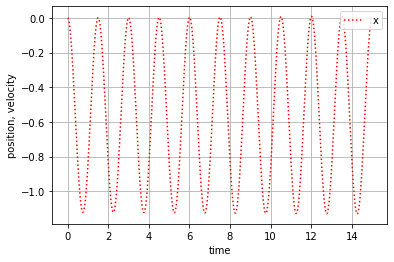

In [19]:
# F = -mg + kx
from pylab import *
#首先定义欧拉积分函数
#我们需要给出目前的状态y，目前的时间t，取的时间间隔dt，以及一阶的微分关系
def euler(y, t, dt, derivs):
    y_next = y + derivs(y,t) * dt
    return y_next
def SHO(state , time):
    g0 = state[1]
    g1 = -k/m * state[0] -gravity
    return np.array([g0,g1])
#————————————————————————————————
#参数设定
N = 100000
x0 = 0.0
v0 = 0.0
tau = 15.0
dt = tau/float(N-1)

k = 3.5
m = 0.2
gravity = 9.8
#————————————————————————
#分配内存
time = np.linspace(0, tau, N)
y = np.zeros([N,2])#先给y分配好空间！因为一共跑N次，自然是N*2的矩阵

y[0,0] = x0
y[0,1] = v0
#——————————————————————
#循环求解
for i in range(N-1):
    y[i+1] = euler(y[i],time[i],dt,SHO)
xdata = [y[i,0] for i in range(N)]
vdata = [y[i,1] for i in range(N)]

plt.plot(time, xdata,"r:",label="x")
#plt.plot(time, vdata,label = "v")
plt.xlabel("time")
plt.ylabel("position, velocity")
plt.legend(loc=1)
plt.grid()
plt.show()

# 作为练习，看看能不能“默写”代码！
$$F = -mg + kx$$
$$ \ddot{x} = -\frac{k}{m}x - g$$
$$\dot{x} =v$$
$$\dot{v} =\frac{k}{m}x-g$$

$$y = \begin{bmatrix} x(t)\\v(t) \end{bmatrix}$$

$$\dot{y} = \begin{bmatrix} v(t)\\-\frac{k}{m}x(t) - g \end{bmatrix}$$

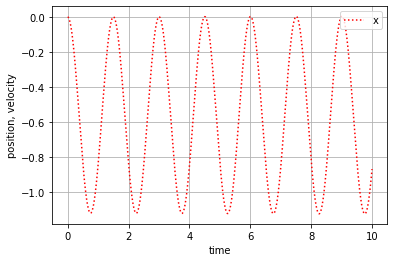

In [27]:
def Euler(y , t, dt, derivs):
    y_next = y + derivs(y,t) * dt
    return y_next
def SHO(y,t):
    dot0 = y[1]
    dot1 = -k/m*y[0] - gravity
    return np.array([dot0,dot1])

N = 100000
x0 = 0.0
v0 = 0.0
k = 3.5
m = 0.2
gravity = 9.8

tau = 10
dt = tau/float(N-1)

state = np.zeros([N,2])
time = np.linspace(0,tau,N)

state[0,0] = x0
state[0,1] = v0

for i in range(N-1):
    state[i+1] = Euler(state[i], time[i] , dt, SHO)
x = [state[i,0] for i in range(N)]
v = [state[i,1] for i in range(N)]
    
plt.plot(time, x,"r:",label="x")
#plt.plot(time, vdata,label = "v")
plt.xlabel("time")
plt.ylabel("position, velocity")
plt.legend(loc=1)
plt.grid()
plt.show()
    